# Classification of other datasets, not used for training

In [108]:
from keras.models import load_model
import tensorflow as tf
import os
from keras.preprocessing import image
import numpy as np
import pandas as pd

In [109]:
ih, iw = 64, 64
ch = 'rgb'
model_dir = "C:/Users/Max/Documents/GitHub/DenseNet/DenseNet-cgan-kaggle-v008/model.h5"

In [110]:
model = load_model(model_dir)
model.compile(optimizer='adam', loss='losses.sparse_categorical_crossentropy', metrics=['accuracy'])

In [111]:
index_1 = model_dir.find('/', 30) + 1
index_2 = model_dir.find('/', index_1)
index_3 = model_dir.find('-', index_1)
model_type = model_dir[index_1:index_2]
trimmed_model_type = model_dir[index_1:index_3]

print(model_type)
print(trimmed_model_type)

DenseNet-cgan-kaggle-v008
DenseNet


In [112]:
data_dir = "C:/Users/Max/Documents/ransomware_val/virusshare"

data_i_1 = data_dir.find('/', 30)+1

data_type = data_dir[data_i_1:]

if data_type == 'virusshare':
    data_file_count = 4332
elif data_type == 'bazaarImages':
    data_file_count = 968
else: 
    data_file_count = 'unknown'

In [113]:
rw_imgs = np.array([])
rw_family = np.array([])
rw_labels = np.array([]).astype("int32")

b_imgs = np.array([])
b_family = np.array([])
b_labels = np.array([]).astype("int32")

imgs = np.array([])
family = np.array([])
labels = np.array([]).astype("int32")

i = 0

for root, dirs, files in os.walk(data_dir): 
    for filename in files:
        path = os.path.join(root, filename)
        img = image.load_img(path, target_size=(iw,ih), color_mode=ch)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
    
        images = np.vstack([x])
        p = model.predict(images)

        # Keep track of progress
        i = i + 1
        print(f"{i} of {data_file_count} files")
        
        # Retrieve name of software family (e.g. Reveton)
        p_i_1 = path.find('/', 30)+len(data_type)+2
        p_i_2 = path.find("\\", p_i_1)
        family_name = path[p_i_1:p_i_2]
    
        # Predicted label
        q = p.argmax()
        
        imgs = np.append(imgs, path)
        family = np.append(family, family_name)
        labels = np.append(labels, q)
        
        if np.any(p>0.5):
            if not q == 10:
                rw_imgs = np.append(rw_imgs, path)
                rw_family = np.append(rw_family, family_name)
                rw_labels = np.append(rw_labels, q)
            if q == 10:
                b_imgs = np.append(b_imgs, path)
                b_family = np.append(b_family, family_name)
                b_labels = np.append(b_labels, q)

rw_imgs_family_labels = pd.DataFrame({'file': rw_imgs, 'family': rw_family, 'label': rw_labels}, 
                                     columns=['file', 'family', 'label'])
b_imgs_family_labels = pd.DataFrame({'file': b_imgs, 'family': b_family, 'label': b_labels}, 
                                     columns=['file', 'family', 'label'])
imgs_family_labels = pd.DataFrame({'file': imgs, 'family': family, 'label': labels}, 
                                     columns=['file', 'family', 'label'])

1 of 4332 files
2 of 4332 files
3 of 4332 files
4 of 4332 files
5 of 4332 files
6 of 4332 files
7 of 4332 files
8 of 4332 files
9 of 4332 files
10 of 4332 files
11 of 4332 files
12 of 4332 files
13 of 4332 files
14 of 4332 files
15 of 4332 files
16 of 4332 files
17 of 4332 files
18 of 4332 files
19 of 4332 files
20 of 4332 files
21 of 4332 files
22 of 4332 files
23 of 4332 files
24 of 4332 files
25 of 4332 files
26 of 4332 files
27 of 4332 files
28 of 4332 files
29 of 4332 files
30 of 4332 files
31 of 4332 files
32 of 4332 files
33 of 4332 files
34 of 4332 files
35 of 4332 files
36 of 4332 files
37 of 4332 files
38 of 4332 files
39 of 4332 files
40 of 4332 files
41 of 4332 files
42 of 4332 files
43 of 4332 files
44 of 4332 files
45 of 4332 files
46 of 4332 files
47 of 4332 files
48 of 4332 files
49 of 4332 files
50 of 4332 files
51 of 4332 files
52 of 4332 files
53 of 4332 files
54 of 4332 files
55 of 4332 files
56 of 4332 files
57 of 4332 files
58 of 4332 files
59 of 4332 files
60 of 

464 of 4332 files
465 of 4332 files
466 of 4332 files
467 of 4332 files
468 of 4332 files
469 of 4332 files
470 of 4332 files
471 of 4332 files
472 of 4332 files
473 of 4332 files
474 of 4332 files
475 of 4332 files
476 of 4332 files
477 of 4332 files
478 of 4332 files
479 of 4332 files
480 of 4332 files
481 of 4332 files
482 of 4332 files
483 of 4332 files
484 of 4332 files
485 of 4332 files
486 of 4332 files
487 of 4332 files
488 of 4332 files
489 of 4332 files
490 of 4332 files
491 of 4332 files
492 of 4332 files
493 of 4332 files
494 of 4332 files
495 of 4332 files
496 of 4332 files
497 of 4332 files
498 of 4332 files
499 of 4332 files
500 of 4332 files
501 of 4332 files
502 of 4332 files
503 of 4332 files
504 of 4332 files
505 of 4332 files
506 of 4332 files
507 of 4332 files
508 of 4332 files
509 of 4332 files
510 of 4332 files
511 of 4332 files
512 of 4332 files
513 of 4332 files
514 of 4332 files
515 of 4332 files
516 of 4332 files
517 of 4332 files
518 of 4332 files
519 of 433

923 of 4332 files
924 of 4332 files
925 of 4332 files
926 of 4332 files
927 of 4332 files
928 of 4332 files
929 of 4332 files
930 of 4332 files
931 of 4332 files
932 of 4332 files
933 of 4332 files
934 of 4332 files
935 of 4332 files
936 of 4332 files
937 of 4332 files
938 of 4332 files
939 of 4332 files
940 of 4332 files
941 of 4332 files
942 of 4332 files
943 of 4332 files
944 of 4332 files
945 of 4332 files
946 of 4332 files
947 of 4332 files
948 of 4332 files
949 of 4332 files
950 of 4332 files
951 of 4332 files
952 of 4332 files
953 of 4332 files
954 of 4332 files
955 of 4332 files
956 of 4332 files
957 of 4332 files
958 of 4332 files
959 of 4332 files
960 of 4332 files
961 of 4332 files
962 of 4332 files
963 of 4332 files
964 of 4332 files
965 of 4332 files
966 of 4332 files
967 of 4332 files
968 of 4332 files
969 of 4332 files
970 of 4332 files
971 of 4332 files
972 of 4332 files
973 of 4332 files
974 of 4332 files
975 of 4332 files
976 of 4332 files
977 of 4332 files
978 of 433

1362 of 4332 files
1363 of 4332 files
1364 of 4332 files
1365 of 4332 files
1366 of 4332 files
1367 of 4332 files
1368 of 4332 files
1369 of 4332 files
1370 of 4332 files
1371 of 4332 files
1372 of 4332 files
1373 of 4332 files
1374 of 4332 files
1375 of 4332 files
1376 of 4332 files
1377 of 4332 files
1378 of 4332 files
1379 of 4332 files
1380 of 4332 files
1381 of 4332 files
1382 of 4332 files
1383 of 4332 files
1384 of 4332 files
1385 of 4332 files
1386 of 4332 files
1387 of 4332 files
1388 of 4332 files
1389 of 4332 files
1390 of 4332 files
1391 of 4332 files
1392 of 4332 files
1393 of 4332 files
1394 of 4332 files
1395 of 4332 files
1396 of 4332 files
1397 of 4332 files
1398 of 4332 files
1399 of 4332 files
1400 of 4332 files
1401 of 4332 files
1402 of 4332 files
1403 of 4332 files
1404 of 4332 files
1405 of 4332 files
1406 of 4332 files
1407 of 4332 files
1408 of 4332 files
1409 of 4332 files
1410 of 4332 files
1411 of 4332 files
1412 of 4332 files
1413 of 4332 files
1414 of 4332

1794 of 4332 files
1795 of 4332 files
1796 of 4332 files
1797 of 4332 files
1798 of 4332 files
1799 of 4332 files
1800 of 4332 files
1801 of 4332 files
1802 of 4332 files
1803 of 4332 files
1804 of 4332 files
1805 of 4332 files
1806 of 4332 files
1807 of 4332 files
1808 of 4332 files
1809 of 4332 files
1810 of 4332 files
1811 of 4332 files
1812 of 4332 files
1813 of 4332 files
1814 of 4332 files
1815 of 4332 files
1816 of 4332 files
1817 of 4332 files
1818 of 4332 files
1819 of 4332 files
1820 of 4332 files
1821 of 4332 files
1822 of 4332 files
1823 of 4332 files
1824 of 4332 files
1825 of 4332 files
1826 of 4332 files
1827 of 4332 files
1828 of 4332 files
1829 of 4332 files
1830 of 4332 files
1831 of 4332 files
1832 of 4332 files
1833 of 4332 files
1834 of 4332 files
1835 of 4332 files
1836 of 4332 files
1837 of 4332 files
1838 of 4332 files
1839 of 4332 files
1840 of 4332 files
1841 of 4332 files
1842 of 4332 files
1843 of 4332 files
1844 of 4332 files
1845 of 4332 files
1846 of 4332

2226 of 4332 files
2227 of 4332 files
2228 of 4332 files
2229 of 4332 files
2230 of 4332 files
2231 of 4332 files
2232 of 4332 files
2233 of 4332 files
2234 of 4332 files
2235 of 4332 files
2236 of 4332 files
2237 of 4332 files
2238 of 4332 files
2239 of 4332 files
2240 of 4332 files
2241 of 4332 files
2242 of 4332 files
2243 of 4332 files
2244 of 4332 files
2245 of 4332 files
2246 of 4332 files
2247 of 4332 files
2248 of 4332 files
2249 of 4332 files
2250 of 4332 files
2251 of 4332 files
2252 of 4332 files
2253 of 4332 files
2254 of 4332 files
2255 of 4332 files
2256 of 4332 files
2257 of 4332 files
2258 of 4332 files
2259 of 4332 files
2260 of 4332 files
2261 of 4332 files
2262 of 4332 files
2263 of 4332 files
2264 of 4332 files
2265 of 4332 files
2266 of 4332 files
2267 of 4332 files
2268 of 4332 files
2269 of 4332 files
2270 of 4332 files
2271 of 4332 files
2272 of 4332 files
2273 of 4332 files
2274 of 4332 files
2275 of 4332 files
2276 of 4332 files
2277 of 4332 files
2278 of 4332

2660 of 4332 files
2661 of 4332 files
2662 of 4332 files
2663 of 4332 files
2664 of 4332 files
2665 of 4332 files
2666 of 4332 files
2667 of 4332 files
2668 of 4332 files
2669 of 4332 files
2670 of 4332 files
2671 of 4332 files
2672 of 4332 files
2673 of 4332 files
2674 of 4332 files
2675 of 4332 files
2676 of 4332 files
2677 of 4332 files
2678 of 4332 files
2679 of 4332 files
2680 of 4332 files
2681 of 4332 files
2682 of 4332 files
2683 of 4332 files
2684 of 4332 files
2685 of 4332 files
2686 of 4332 files
2687 of 4332 files
2688 of 4332 files
2689 of 4332 files
2690 of 4332 files
2691 of 4332 files
2692 of 4332 files
2693 of 4332 files
2694 of 4332 files
2695 of 4332 files
2696 of 4332 files
2697 of 4332 files
2698 of 4332 files
2699 of 4332 files
2700 of 4332 files
2701 of 4332 files
2702 of 4332 files
2703 of 4332 files
2704 of 4332 files
2705 of 4332 files
2706 of 4332 files
2707 of 4332 files
2708 of 4332 files
2709 of 4332 files
2710 of 4332 files
2711 of 4332 files
2712 of 4332

3095 of 4332 files
3096 of 4332 files
3097 of 4332 files
3098 of 4332 files
3099 of 4332 files
3100 of 4332 files
3101 of 4332 files
3102 of 4332 files
3103 of 4332 files
3104 of 4332 files
3105 of 4332 files
3106 of 4332 files
3107 of 4332 files
3108 of 4332 files
3109 of 4332 files
3110 of 4332 files
3111 of 4332 files
3112 of 4332 files
3113 of 4332 files
3114 of 4332 files
3115 of 4332 files
3116 of 4332 files
3117 of 4332 files
3118 of 4332 files
3119 of 4332 files
3120 of 4332 files
3121 of 4332 files
3122 of 4332 files
3123 of 4332 files
3124 of 4332 files
3125 of 4332 files
3126 of 4332 files
3127 of 4332 files
3128 of 4332 files
3129 of 4332 files
3130 of 4332 files
3131 of 4332 files
3132 of 4332 files
3133 of 4332 files
3134 of 4332 files
3135 of 4332 files
3136 of 4332 files
3137 of 4332 files
3138 of 4332 files
3139 of 4332 files
3140 of 4332 files
3141 of 4332 files
3142 of 4332 files
3143 of 4332 files
3144 of 4332 files
3145 of 4332 files
3146 of 4332 files
3147 of 4332

3527 of 4332 files
3528 of 4332 files
3529 of 4332 files
3530 of 4332 files
3531 of 4332 files
3532 of 4332 files
3533 of 4332 files
3534 of 4332 files
3535 of 4332 files
3536 of 4332 files
3537 of 4332 files
3538 of 4332 files
3539 of 4332 files
3540 of 4332 files
3541 of 4332 files
3542 of 4332 files
3543 of 4332 files
3544 of 4332 files
3545 of 4332 files
3546 of 4332 files
3547 of 4332 files
3548 of 4332 files
3549 of 4332 files
3550 of 4332 files
3551 of 4332 files
3552 of 4332 files
3553 of 4332 files
3554 of 4332 files
3555 of 4332 files
3556 of 4332 files
3557 of 4332 files
3558 of 4332 files
3559 of 4332 files
3560 of 4332 files
3561 of 4332 files
3562 of 4332 files
3563 of 4332 files
3564 of 4332 files
3565 of 4332 files
3566 of 4332 files
3567 of 4332 files
3568 of 4332 files
3569 of 4332 files
3570 of 4332 files
3571 of 4332 files
3572 of 4332 files
3573 of 4332 files
3574 of 4332 files
3575 of 4332 files
3576 of 4332 files
3577 of 4332 files
3578 of 4332 files
3579 of 4332

3961 of 4332 files
3962 of 4332 files
3963 of 4332 files
3964 of 4332 files
3965 of 4332 files
3966 of 4332 files
3967 of 4332 files
3968 of 4332 files
3969 of 4332 files
3970 of 4332 files
3971 of 4332 files
3972 of 4332 files
3973 of 4332 files
3974 of 4332 files
3975 of 4332 files
3976 of 4332 files
3977 of 4332 files
3978 of 4332 files
3979 of 4332 files
3980 of 4332 files
3981 of 4332 files
3982 of 4332 files
3983 of 4332 files
3984 of 4332 files
3985 of 4332 files
3986 of 4332 files
3987 of 4332 files
3988 of 4332 files
3989 of 4332 files
3990 of 4332 files
3991 of 4332 files
3992 of 4332 files
3993 of 4332 files
3994 of 4332 files
3995 of 4332 files
3996 of 4332 files
3997 of 4332 files
3998 of 4332 files
3999 of 4332 files
4000 of 4332 files
4001 of 4332 files
4002 of 4332 files
4003 of 4332 files
4004 of 4332 files
4005 of 4332 files
4006 of 4332 files
4007 of 4332 files
4008 of 4332 files
4009 of 4332 files
4010 of 4332 files
4011 of 4332 files
4012 of 4332 files
4013 of 4332

In [114]:
save_dir = f"C:/Users/Max/Documents/validation_runs/{data_type}_{model_type}"
try:
    os.makedirs(save_dir)
except:
    print("Folder already exists! Do you want to continue?")
    input("Press 'Enter' to continue")

rw_imgs_family_labels.to_csv(path_or_buf=f"{save_dir}/rw_{data_type}_{model_type}.csv")
b_imgs_family_labels.to_csv(path_or_buf=f"{save_dir}/b_{data_type}_{model_type}.csv")
imgs_family_labels.to_csv(path_or_buf=f"{save_dir}/{data_type}_{model_type}.csv")

# Analysis

In [115]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef, accuracy_score
from prettytable import PrettyTable, MSWORD_FRIENDLY
import seaborn as sns

In [116]:
y_predbin = []
y_truebin = []

for count, value in enumerate(labels):
    y_truebin.append(0)
    if labels[count] in range(10):
        y_predbin.append(0)
        
    else: y_predbin.append(1)
    

In [117]:
labels

array([10, 10, 10, ..., 10, 10, 10], dtype=int64)

In [118]:
print(np.unique(labels, return_counts=True))

(array([ 6,  8, 10], dtype=int64), array([ 372,    1, 3959], dtype=int64))


In [119]:
c_matrix_bin = metrics.confusion_matrix(y_truebin, y_predbin)

In [120]:
def confusion_matrix_bin(confusion_matrix, class_names_bin, figsize = (5,2), fontsize=7):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names_bin, columns=class_names_bin, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"{model_type}")
    plt.savefig(f"C:/Users/Max/Documents/validation_runs/visuals/CM_{data_type}_{model_type}.png", bbox_inches = 'tight')
    plt.savefig(f"{save_dir}/CM_{data_type}_{model_type}.png", bbox_inches = 'tight')

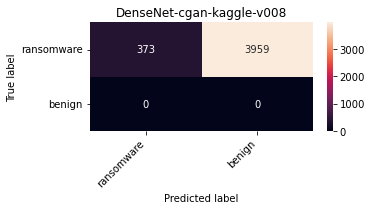

In [121]:
class_names_bin= ("ransomware", "benign")
confusion_matrix_bin(c_matrix_bin, class_names_bin, figsize = (5,2), fontsize=10)

**Performance per family**

In [122]:
fam_labels = pd.DataFrame(imgs_family_labels, columns=['family', 'label'])
fam_labels['label'] = fam_labels['label'].astype('str')

In [123]:
for count, value in enumerate(fam_labels['label'].values):
    if int(fam_labels['label'].values[count]) in range(10):
        fam_labels['label'].values[count] = 'ransomware'
    else:
        fam_labels['label'].values[count] = 'benign'

In [124]:
fam_labels['label'].values

array(['benign', 'benign', 'benign', ..., 'benign', 'benign', 'benign'],
      dtype=object)

In [125]:
df = fam_labels.value_counts(sort=False)

<AxesSubplot:xlabel='family'>

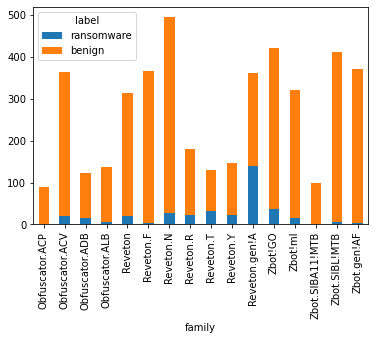

In [126]:
df.unstack().plot(kind = 'bar', stacked=True, y=['ransomware', 'benign'])

In [127]:
dfu = df.unstack()

In [128]:
df.unstack()

label,benign,ransomware
family,,
Obfuscator.ACP,88.0,2.0
Obfuscator.ACV,343.0,21.0
Obfuscator.ADB,108.0,16.0
Obfuscator.ALB,131.0,6.0
Reveton,294.0,20.0
Reveton.F,362.0,4.0
Reveton.N,467.0,28.0
Reveton.R,158.0,22.0
Reveton.T,97.0,33.0


In [129]:
for count, label in enumerate(dfu['benign']):
    total = dfu['benign'][count] + dfu['ransomware'][count]
    dfu['benign'][count] = dfu['benign'][count] / total * 100
    dfu['ransomware'][count] = dfu['ransomware'][count] / total * 100

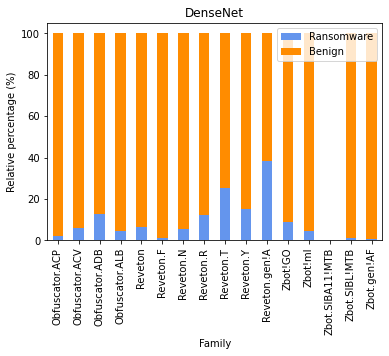

In [130]:
per_distr = dfu.plot(kind = 'bar', stacked=True, y=['ransomware', 'benign'], color = ['cornflowerblue', 'darkorange'])
plt.legend(['Ransomware', 'Benign'])
plt.xlabel('Family')
plt.ylabel('Relative percentage (%)')
plt.title(trimmed_model_type)
plt.savefig(f"{save_dir}/BP_{data_type}_{model_type}.png", bbox_inches = 'tight')
plt.savefig(f"C:/Users/Max/Documents/validation_runs/visuals/BP_{data_type}_{model_type}.png", bbox_inches = 'tight')